In [1]:
!pip install --upgrade qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 5.2 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 41.1 MB/s eta 0:00:01
  Created wheel for qiskit: filename=qiskit-0.43.0-py3-none-any.whl size=7996 sha256=e4a38650ec34ec5171e63c3a6530442eedaed23fb28c10b03aa3dc155fc9b09a
  Stored in directory: /Users/koichiro/Library/Caches/pip/wheels/4c/50/5d/d328e7c261525a18b321185d6073494990134f0b839c448ab1
Successfully built qiskit
  Attempting uninstall: symengine
    Found existing installation: symengine 0.10.0
    Uninstalling symengine-0.10.0:
      Successfully uninstalled symengine-0.10.0
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.23.3
    Uninstalling qiskit-terra-0.23.3:
      Successfully uninstalled qiskit-terra-0.23.3
  Attempting uninstall: qiskit
    Found exist

# Basics of quantum information
By Qiskit

## Single systems

In [2]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0/2 + ket1/2)

array([0.5, 0.5])

In [3]:
ket0/2 + ket1/2

array([0.5, 0.5])

In [4]:
M1 = array([ [1, 1], [0, 0]])
M2 = array([ [1, 1], [1, 0]])

M1/2 + M2/2

array([[1. , 1. ],
       [0.5, 0. ]])

### Matrix multplication

In [5]:
from numpy import matmul

display(matmul(M1,ket1))
display(matmul(M1,M2))
display(matmul(M2,M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

### Qiskit's Statevector
We can define the quantum state vector with the functionality

In [6]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2j)/3, -2/3])
w = Statevector([1/3, 2/3])

print( "State vector u, v, and w have been defined.")

State vector u, v, and w have been defined.


*Statevector* class has a **draw** method for displaying the state vectors neatly.

In [7]:
display(u.draw('latex'))
display(v.draw('text'))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

Also we can check the normality by **is_valid()** method

In [8]:
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

True

False

In [9]:
p = Statevector([(1+2.j)/3, -2/3])
p.draw('latex') 

<IPython.core.display.Latex object>

## Simulating measurements using Statevector
We can simulate the quantum measurements by **measure()** method

In [10]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

**measure()** gives you the error if Statevector is not normalized

In [11]:
m = Statevector([1,1])
#m.measure()

**plot_histogram** method makes the histogram

In [12]:
from qiskit.visualization import plot_histogram

**sample_counts(#number)** method does the **measure()** method for a sample initial quantum state vector #number times

{'0': 548, '1': 452}

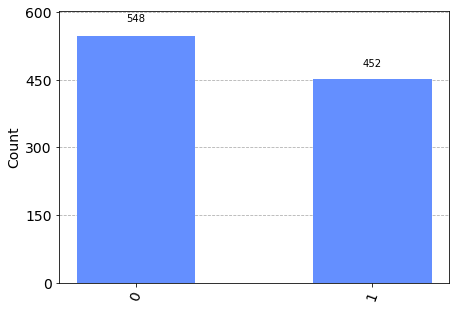

In [13]:
statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

## Performing operatins with Operator and Statevector
Unitary oparators can be defined by **Operator**,
and performed by **evolve(Operator)** method.

In [14]:
from qiskit.quantum_info import Operator

In [15]:
X = Operator([ [0,1],  [1,0] ] ) # NOT
Y = Operator([ [0,-1j], [1j,0] ])
Z = Operator([ [1,0], [0,-1] ]) # Phase flip
H = Operator([ [1/sqrt(2),1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)] ]) # Hadamard operator
S = Operator([ [1,0], [0,1j] ]) # P pi/2
T = Operator([ [1,0], [0, (1+1j)/sqrt(2)] ])

display(X)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Let's operate NOT operator

In [16]:
v = Statevector([1,0])
display(v.draw('latex'))

v = v.evolve(X)
v.draw('latex')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Looking ahead toward quantum circuits

In [17]:
from qiskit import QuantumCircuit

In [18]:
circuit = QuantumCircuit(1)

In [19]:
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [20]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw('latex')

<IPython.core.display.Latex object>

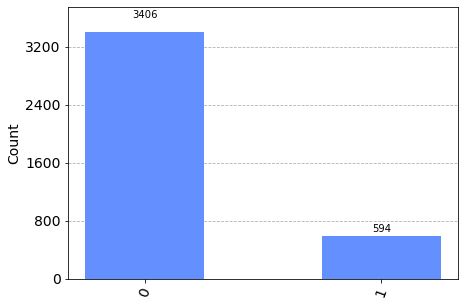

In [21]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

In [22]:
from qiskit.quantum_info import Statevector, Operator

We can use **v.tensor(u)** method to take a tensor product

In [24]:
zero, one = Statevector.from_label('0'), Statevector.from_label('1')
a = zero.tensor(one) # returns new 'Statevector' 0×1

a.draw('latex')

<IPython.core.display.Latex object>

In [28]:
from numpy import sqrt
plus = Statevector.from_label('+')
i_state = Statevector([1/sqrt(2), 1j/sqrt(2)])

psi = plus.tensor(i_state)
psi.draw('latex')

<IPython.core.display.Latex object>

In [32]:
X = Operator([ [0,1], [1,0] ])
I = Operator([ [1,0], [0,1] ])

X.tensor(I)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

We can teke a tensor product by just **^**

In [35]:
(psi.evolve(I^X)).draw('latex')

<IPython.core.display.Latex object>

In [38]:
CNOT = Operator([ [1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])
(psi.evolve(CNOT)).draw('latex')

<IPython.core.display.Latex object>

In [40]:
display(zero.draw('latex'))
display(one.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [47]:
zeroone = zero.tensor(one)
zeroone.draw('latex')

<IPython.core.display.Latex object>

In [58]:
from numpy import sqrt
W = Statevector([0,1,1,0,1,0,0,0]/sqrt(3))
W.draw('latex')

<IPython.core.display.Latex object>

**.measure()** method gives you the result and the updated state.

In [60]:
result, new_sv = W.measure([0]) # measure qubit 0
print(f'Measured: {result}\nState after measurement:')
new_sv.draw('latex')

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

In [76]:
W.draw('latex')
ev = W.evolve(I^I^H)
display(ev.draw('latex'))
statistics = ev.sample_counts(4000)
plot_histogram(statistics)
result, new_ev = ev.measure([0])
print(result)
new_ev.draw('latex')

<IPython.core.display.Latex object>

1


<IPython.core.display.Latex object>

In [77]:
import qiskit.tools.jupyter
%qiskit_version_table

In [88]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1) # QuantumCircuit(number) and number is the number of circuit line.
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [98]:
from qiskit import QuantumCircuit, QuantumRegister
X = QuantumRegister(1, "x") # You can label it!
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
x: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

In [103]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
X = QuantumRegister(1, "x")
Y = QuantumRegister(1, "y")
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")
circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)

circuit.measure(Y, B)
circuit.measure(X, A)
circuit.draw()

┌───┐     ┌─┐   
  y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  x: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
b: 1/═══════════╩══╬═
                0  ║ 
a: 1/══════════════╩═
                   0

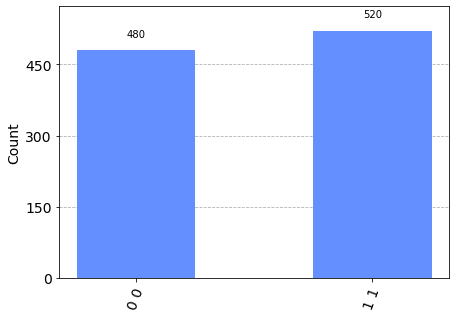

In [110]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

simulator = AerSimulator()
circuit_simulator = simulator.run(transpile(circuit, simulator), shots = 1000)
statistics = circuit_simulator.result().get_counts()
plot_histogram(statistics)

In [112]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

protocol.draw()

░      ┌───┐ ░    ┌─┐ ░                         
Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────
   ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                         
A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────
   └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌──────────┐┌──────────┐
B: ─────┤ X ├─░────────────░──╫──╫──░─┤0         ├┤0         ├
        └───┘ ░            ░  ║  ║  ░ │  If_else ││          │
a: ═══════════════════════════╩══╬════╡0         ╞╡          ╞
                                 ║    └──────────┘│          │
b: ══════════════════════════════╩════════════════╡0         ╞
                                                  └──────────┘

In [113]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol, along with a new "auxiliary" qubit R.
aux = QuantumRegister(1, "R")
test = QuantumCircuit(aux, qubit, ebit0, ebit1, a, b)

# Entangle Q with R
test.h(aux)
test.cx(aux, qubit)
test.barrier()

# Append the protocol the circuit. The 'qubits' argument tells Qiskit that
# the protocol should operate on the qubits numbered 1, 2, and 3 (skipping
# qubit 0, which is R).
test = test.compose(protocol, qubits=[1, 2, 3])
test.barrier()

# After the protocol runs, check that (B,R) is in a phi+ state. We can add
# a new classical bit to the circuit to do this.
test.cx(aux, ebit1)
test.h(aux)
result = ClassicalRegister(1, "Test result")
test.add_register(result)
test.measure(aux, result)

test.draw()

┌───┐      ░                                                »
          R: ┤ H ├──■───░────────────────────────────────────────────────»
             └───┘┌─┴─┐ ░            ░      ┌───┐ ░    ┌─┐ ░             »
          Q: ─────┤ X ├─░────────────░───■──┤ H ├─░────┤M├─░─────────────»
                  └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░             »
          A: ───────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────»
                        ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌──────────┐»
          B: ───────────░──────┤ X ├─░────────────░──╫──╫──░─┤0         ├»
                        ░      └───┘ ░            ░  ║  ║  ░ │  If_else │»
          a: ════════════════════════════════════════╩══╬════╡0         ╞»
                                                        ║    └──────────┘»
          b: ═══════════════════════════════════════════╩════════════════»
                                                                         »
Test result: ════════════════════════════════════════════════════════════»
                                                                         »
«                          ░      ┌───┐┌─┐
«          R: ─────────────░───■──┤ H ├┤M├
«                          ░   │  └───┘└╥┘
«          Q: ─────────────░───┼────────╫─
«                          ░   │        ║ 
«          A: ─────────────░───┼────────╫─
«             ┌──────────┐ ░ ┌─┴─┐      ║ 
«          B: ┤0         ├─░─┤ X ├──────╫─
«             │          │ ░ └───┘      ║ 
«          a: ╡          ╞══════════════╬═
«             │          │              ║ 
«          b: ╡0         ╞══════════════╬═
«             └──────────┘              ║ 
«Test result: ══════════════════════════╩═
«

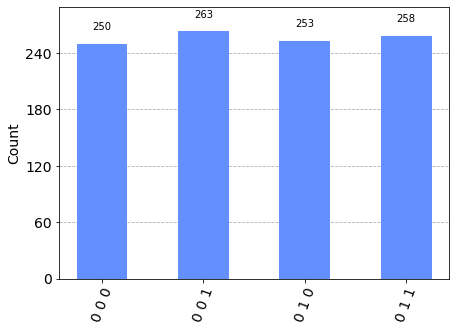

In [114]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

counts = AerSimulator().run(test).result().get_counts()
plot_histogram(counts)

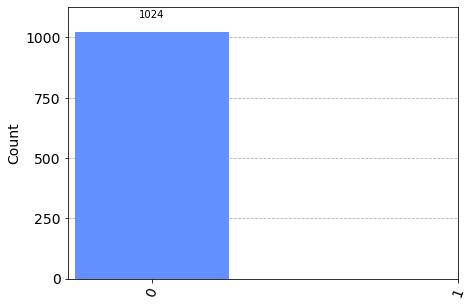

In [115]:
filtered_counts = {"0": 0, "1": 0}

for result, frequency in counts.items():
    filtered_counts[result[0] ] += frequency

plot_histogram(filtered_counts)